### **How to create Agentic System with OpenAI library - The Fundamentals**

In [4]:
#All Necessary Imports 
import os 
import json
import requests
from openai import OpenAI
from anthropic import Anthropic
from dotenv import load_dotenv
from IPython.display import Markdown, display
from pydantic import BaseModel
from typing import List
from pypdf import PdfReader
from gradio import ChatInterface

load_dotenv(override=True)

True

#### 1: **How to use models from different inference providers using OpenAI library**

In [5]:
#Loading all the api keys from environment variables
openai_api_key = os.getenv('OPENAI_API_KEY')
google_api_key = os.getenv('GOOGLE_API_KEY')
deepseek_api_key = os.getenv('DEEPSEEK_API_KEY')
groq_api_key = os.getenv('GROQ_API_KEY')
anthropic_api_key = os.getenv('ANTHROPIC_API_KEY')
openrouter_api_key = os.getenv('OPENROUTER_API_KEY')

In [6]:
def check_keys():
    keys = {
        "OpenAI API Key": openai_api_key,
        "Google API Key": google_api_key,
        "Deepseek API Key": deepseek_api_key,
        "Groq API Key": groq_api_key,
        "Anthropic API Key": anthropic_api_key,
        "OpenRouter API Key": openrouter_api_key
    }
    for name, key in keys.items():
        if key:
            print(f"{name} is set.")
        else:
            print(f"{name} is NOT set. Please set it in the .env file.")

check_keys()

OpenAI API Key is set.
Google API Key is set.
Deepseek API Key is set.
Groq API Key is set.
Anthropic API Key is NOT set. Please set it in the .env file.
OpenRouter API Key is set.


In [7]:
"""Initialize all the clients here"""

openai_client = OpenAI()
gemini_client = OpenAI(api_key=google_api_key, base_url="https://generativelanguage.googleapis.com/v1beta/openai/") 
deepseek_client = OpenAI(api_key=deepseek_api_key, base_url="https://api.deepseek.com/v1")
groq = OpenAI(api_key=groq_api_key, base_url="https://api.groq.com/openai/v1")
openrouter_client = OpenAI(api_key=openrouter_api_key, base_url="https://openrouter.ai/api/v1")  # free to get from openrouter.ai
# claud_client = Anthropic()   uncomment if you have anthropic api key

"""local model through ollama"""
ollama_client = OpenAI(base_url='http://localhost:11434/v1', api_key='ollama')

"""
Using deepseek models through deepseek apis requires paid account, we can access deepseek free tier models through openrouter 
"""

'\nUsing deepseek models through deepseek apis requires paid account, we can access deepseek free tier models through openrouter \n'

#### Calling openai llm using api and OpenAI python client


In [8]:
message = [{"role":"user", "content":"What is an Agentic Workflow?"}]  #this is the format required by openai api to pass content

respomse = openai_client.chat.completions.create(   #this is the method to call chat completion
    model="gpt-4.1-nano",
    messages=message
)

answer = respomse.choices[0].message.content #extracting the answer from the response

#Displaying the answer in markdown format
display(Markdown(answer))

An **Agentic Workflow** refers to a structured process or series of steps designed to enable individuals or autonomous agents to achieve specific goals through proactive decision-making and action. In this context, "agentic" emphasizes the proactive, self-directed, and autonomous role of the agent—whether a human, software, or system—in managing its tasks and environment.

**Key characteristics of an Agentic Workflow include:**

- **Autonomy:** The agent makes decisions independently based on its knowledge or goals.
- **Proactivity:** The agent takes initiative to pursue tasks or adapt to changes without constant external prompts.
- **Goal-Orientation:** The workflow is driven by clear objectives or outcomes.
- **Adaptive Decision-Making:** The agent can modify its actions dynamically based on new information or changing conditions.
- **Iterative Process:** Often involves repeating steps, learning from previous actions, and refining strategies.

**Applications of Agentic Workflows include:**

- **Automated systems and AI agents** that perform tasks like data analysis, customer support, or process automation.
- **Workflow management tools** designed to empower users to customize and control their processes.
- **Robotics** where autonomous robots follow a decision-making process to complete tasks.

Overall, an Agentic Workflow emphasizes empowering autonomous agents with the capacity to manage their processes efficiently and adaptively, often leading to more resilient and intelligent systems.

In [9]:
#this whole series of llm calls to perform a task can also be called an agentic workflow

def ask_gpt(prompt):
    response = openai_client.chat.completions.create(
        model="gpt-4.1-nano",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content

def idea_generation(topic):
    prompt = f"Generate a list of 5 potential subtopics and angles to explore for the topic: {topic}. Provide in bullet points."
    return ask_gpt(prompt)

def research(subtopic):
    prompt = f"Gather relevant information, statistics, and recent advancements in {subtopic}"
    return ask_gpt(prompt)

def outline_creation(research_info):
    prompt = f"Create a detailed outline for a blog post based on the following research information: {research_info}"
    return ask_gpt(prompt)

def drafting(outline):
    prompt = f"Write a draft of a blog post based on the following outline: {outline}"
    return ask_gpt(prompt)

def editing_and_refinement(draft, feedback):
    prompt = f"Revise the following draft based on this feedback: {feedback}\n\nDraft: {draft}"
    return ask_gpt(prompt)

def final_review(draft):
    prompt = f"Check the following draft for grammar, spelling, and style consistency:\n\n{draft}"
    return ask_gpt(prompt)

def run_workflow():
    print("Welcome to the Interactive Blog Writer!")
    
    # Step 1: Get topic
    topic = input("\nEnter your blog topic: ")
    subtopics = idea_generation(topic)
    print("\nSubtopics and Angles:\n")
    display(Markdown(subtopics))

    # Step 2: Choose subtopic
    subtopic = input("\nPick a subtopic from the above list to research: ")
    print(subtopic)
    research_info = research(subtopic)
    print("\nResearch Information:\n")
    display(Markdown(research_info))

    # Step 3: Outline creation
    proceed = input("\nGenerate outline? (y/n): ")
    if proceed.lower() == 'y':
        outline = outline_creation(research_info)
        print("\nOutline:\n")
        display(Markdown(outline))
    else:
        return

    # Step 4: Drafting
    proceed = input("\nCreate a draft based on this outline? (y/n): ")
    if proceed.lower() == 'y':
        draft = drafting(outline)
        print("\nDraft:\n")
        display(Markdown(draft))
    else:
        return

    # Step 5: Editing
    feedback = input("\nEnter feedback for improving the draft: ")
    revised_draft = editing_and_refinement(draft, feedback)
    print("\nRevised Draft:\n")
    display(Markdown(revised_draft))

    # Step 6: Final Review
    proceed = input("\nPerform final grammar and style check? (y/n): ")
    if proceed.lower() == 'y':
        final = final_review(revised_draft)
        print("\nFinal Review:\n")
        display(Markdown(final))


In [10]:
# Run the workflow
run_workflow()

Welcome to the Interactive Blog Writer!

Subtopics and Angles:



- The Impact of Telemedicine and Digital Health Technologies on Patient Care  
- Addressing Healthcare Disparities: Access and Equity in Modern Healthcare Systems  
- Innovations in Personalized Medicine and Their Effect on Treatment Outcomes  
- The Role of Policy and Regulation in Shaping Healthcare Delivery and Costs  
- Mental Health Integration within Primary Healthcare: Challenges and Opportunities

Addressing Healthcare Disparities: Access and Equity in Modern Healthcare Systems

Research Information:



**Addressing Healthcare Disparities: Access and Equity in Modern Healthcare Systems**

**Introduction**

Healthcare disparities refer to differences in health outcomes and access to healthcare services among different population groups, often influenced by socioeconomic status, race, ethnicity, geographic location, language, and other social determinants of health. Tackling these disparities is essential for promoting health equity, ensuring that all individuals receive quality care regardless of their background.

---

### **Current State and Statistics**

- **Disparities in Health Outcomes:**
  - According to the CDC (2021), Black Americans have a life expectancy approximately 3.5 years shorter than White Americans.
  - Hispanic populations experience higher rates of uninsured status (~18.5% uninsured in 2021) compared to the national average (~8.6%).

- **Access to Care:**
  - The Robert Wood Johnson Foundation (2022) reports that rural populations, accounting for about 19% of the U.S. population, face significant barriers, including fewer healthcare providers (only 39 physicians per 100,000 people compared to 59 in urban areas).
  - Racial minorities often experience longer wait times and limited access to specialists.

- **Financial Barriers:**
  - Despite insurance coverage expansions via the Affordable Care Act (ACA), around 30 million Americans remain uninsured or underinsured, disproportionately affecting marginalized groups.

---

### **Recent Advancements and Initiatives**

1. **Policy and Legislation Efforts**
   - **Medicaid Expansion:** Expanded in 38 states plus D.C., increasing access for low-income populations.
   - **The American Rescue Plan Act (2021):** Extended subsidies for ACA marketplace plans, reducing premiums and increasing coverage.

2. **Innovations in Healthcare Delivery**
   - **Telehealth:** Rapid expansion during COVID-19, improving access especially in rural and underserved areas.
   - **Mobile Clinics:** Use of mobile health units to serve remote communities, addressing transportation barriers.
   - **Community Health Workers (CHWs):** Leveraging CHWs for culturally competent outreach and navigation.

3. **Data and Technology**
   - **Electronic Health Records (EHR) & Data Analytics:** Used to identify disparities, tailor interventions, and monitor progress.
   - **AI and Machine Learning:** Emerging tools to predict at-risk populations and personalize care.

4. **Culturally Competent Care**
   - Training programs for providers to reduce implicit bias.
   - Incorporation of interpreter services and culturally tailored health education.

5. **Global and National Research**
   - Initiatives like NIH’s **PRISM** (Partnership to Improve Minority Health Outcomes), focusing on reducing racial and ethnic disparities.
   - Investments in research on social determinants and community-based interventions.

---

### **Key Challenges and Future Directions**

- **Persistent Structural Barriers:** Economic inequality, housing instability, and transportation continue to hinder equitable access.
- **Data Gaps:** Limited disaggregated data inhibits targeted interventions.
- **Integration of Social Determinants of Health:** Embedding social care into healthcare systems remains complex.

**Future strategies** focus on:
- Broader policy reforms addressing upstream social determinants.
- Strengthening community engagement and trust.
- Enhancing data sharing while safeguarding privacy.
- Promoting health literacy and patient-centered approaches.

---

### **Conclusion**

Achieving equity in healthcare access requires multi-faceted efforts incorporating policy reforms, technological innovations, community engagement, and ongoing research. While significant progress has been made, ongoing commitment and systemic change are vital to bridge disparities and ensure health for all.

---

**References**

- CDC. (2021). Health Disparities by Race and Ethnicity. [https://www.cdc.gov/nchhstp/chronic-disease/health-disparities.htm]
- Robert Wood Johnson Foundation. (2022). The State of Health Equity. [https://www.rwjf.org/en/library/research/2022/07/the-state-of-health-equity.html]
- U.S. Census Bureau. (2022). Income and Poverty in the United States. [https://www.census.gov/library/publications/2022/demo/p60-276.html]
- National Institutes of Health (NIH). (2023). PRISM Initiative. [https://www.nih.gov/health-information/your-healthiest-self-toolkit/toolkits/health-equity]
- The Henry J. Kaiser Family Foundation. (2023). Key Facts on the Uninsured. [https://www.kff.org/uninsured/fact-sheet/key-facts-on-the-uninsured/]

---

**Note:** The landscape of healthcare disparities is continually evolving with policy changes, technological advancements, and societal shifts. Regularly consult current publications for the latest data and strategies.


Outline:



# Outline for Blog Post: Addressing Healthcare Disparities: Access and Equity in Modern Healthcare Systems

## I. Introduction
- **Definition of Healthcare Disparities**
  - Differences in health outcomes and access to services among various population groups
  - Influences of social determinants: socioeconomic status, race, ethnicity, geography, language
- **Importance of Addressing Disparities**
  - Promoting health equity
  - Ensuring all individuals receive quality, respectful care
- **Thesis Statement**
  - Exploring current disparities, recent advances, ongoing challenges, and future solutions to achieve healthcare equity

---

## II. Current State and Statistics
### A. Disparities in Health Outcomes
- Black Americans’ life expectancy ~3.5 years shorter than White Americans (CDC, 2021)
- Higher uninsured rates among Hispanic populations (~18.5% uninsured in 2021) compared to national average (~8.6%)

### B. Access to Care
- Rural populations face significant barriers: fewer healthcare providers, with only 39 physicians per 100,000 compared to 59 in urban areas (Robert Wood Johnson Foundation, 2022)
- Racial minorities experience longer wait times and less access to specialists

### C. Financial Barriers
- Despite the ACA expansions, approximately 30 million Americans remain uninsured or underinsured
- Marginalized groups disproportionately affected

---

## III. Recent Advancements and Initiatives
### A. Policy and Legislation Efforts
- **Medicaid Expansion**
  - Adopted in 38 states + D.C., improving access for low-income populations
- **The American Rescue Plan Act (2021)**
  - Extended subsidies, reduced premiums, increased coverage options

### B. Innovations in Healthcare Delivery
- **Telehealth Expansion**
  - Rapid growth during COVID-19, reaching rural and underserved areas
- **Mobile Clinics**
  - Bringing care directly to remote communities, overcoming transportation barriers
- **Community Health Workers (CHWs)**
  - Culturally competent outreach and patient navigation

### C. Data and Technology
- **Electronic Health Records (EHR) & Data Analytics**
  - Identify disparities, monitor progress, customize interventions
- **AI & Machine Learning**
  - Predict at-risk populations, personalize treatments

### D. Culturally Competent Care
- Provider training to reduce implicit bias
- Use of interpreter services and tailored health education

### E. Global and National Research
- NIH’s **PRISM** initiative to reduce racial and ethnic disparities
- Focus on social determinants and community-based solutions

---

## IV. Key Challenges and Future Directions
### A. Persistent Structural Barriers
- Economic inequality, housing instability, transportation issues still hinder access

### B. Data Gaps
- Limited granular data hampers targeted interventions; need for disaggregated data

### C. Integration of Social Determinants
- Challenges embedding social care into healthcare models effectively

### D. Future Strategies
- **Policy Reforms:**
  - Address upstream social determinants like housing, employment
- **Community Engagement and Trust**
  - Building relationships with underserved populations
- **Data Sharing and Privacy**
  - Balance transparency with confidentiality
- **Health Literacy & Patient-Centered Care**
  - Empower individuals to participate actively in their health decisions

---

## V. Conclusion
- **Summary**
  - Progress made through policy, technology, and research
  - Ongoing systemic challenges require sustained effort
- **Call to Action**
  - Multi-faceted approach involving policymakers, healthcare providers, communities, and researchers
  - Commitment to bridging disparities to ensure health for all

---

## VI. References
- Include all cited sources for further reading and validation
- Emphasize the evolving nature of healthcare disparities and the importance of staying updated

---

**Note:** This outline provides a comprehensive framework to craft a compelling, informative blog post that highlights both the progress and the ongoing need for systemic change in healthcare access and equity.


Draft:



**Addressing Healthcare Disparities: Access and Equity in Modern Healthcare Systems**

In an era of remarkable medical innovation and technological advancement, it is disheartening to recognize that health disparities persist across many communities. Healthcare disparities refer to differences in health outcomes, access to services, and quality of care among various population groups, often driven by social determinants such as socioeconomic status, race, ethnicity, geographic location, and language barriers. Tackling these inequities is crucial to fostering a healthier, more equitable society, ensuring that everyone receives respectful, high-quality care regardless of their background.

**Why Address Healthcare Disparities Matters**

Health disparities are not only statistical differences; they represent real-world consequences for millions of Americans who face preventable illnesses, longer hospital stays, and premature death. Achieving health equity—where everyone has a fair opportunity to attain their full health potential—requires deliberate action to eliminate barriers rooted in social and systemic factors.

This blog explores the current landscape of healthcare disparities, recent progress, ongoing challenges, and innovative strategies poised to transform our healthcare system for the better.

---

### The Current Landscape: Stark Disparities in Health Outcomes and Access

Recent data paints a sobering picture. For example, Black Americans typically have a life expectancy approximately 3.5 years shorter than White Americans, highlighting enduring racial disparities in health outcomes (CDC, 2021). Hispanic populations face higher uninsured rates—around 18.5% in 2021—compared to the national average of 8.6%, limiting access to essential services.

Geographic disparities further exacerbate these issues. Rural communities often contend with fewer healthcare providers—only 39 physicians per 100,000 residents compared to 59 in urban areas—making timely and specialized care difficult to access (Robert Wood Johnson Foundation, 2022). Racial and ethnic minorities frequently experience longer wait times and less access to specialists, compounding existing health challenges.

Financial barriers remain a persistent obstacle. Despite the Affordable Care Act (ACA) expanding coverage, approximately 30 million Americans are still uninsured or underinsured, with marginalized groups disproportionately affected.

---

### Progress Through Policy, Innovation, and Research

Significant strides have been made to bridge these gaps. Policy initiatives like Medicaid expansion, adopted in 38 states plus D.C., have improved access for low-income populations, providing vital coverage where it previously didn’t exist. The American Rescue Plan Act of 2021 further extended subsidies, reduced premiums, and broadened coverage options, reducing financial barriers for many.

Innovations in healthcare delivery are also making a difference. The COVID-19 pandemic accelerated the adoption of telehealth, which has been instrumental in reaching rural and underserved communities where traditional clinics may be sparse. Mobile clinics bring care directly to remote areas, overcoming transportation challenges that often prevent vulnerable populations from accessing preventive and ongoing care. Additionally, community health workers (CHWs)—trusted members of their communities trained to provide culturally competent outreach—play a vital role in navigation, education, and early intervention.

Technological advancements such as electronic health records (EHR) and data analytics enable healthcare providers to identify disparities more precisely, monitor progress, and tailor interventions. Artificial intelligence and machine learning further personalize care, predicting at-risk populations and addressing specific needs.

Culturally competent care has become a cornerstone of reducing disparities. Training providers to recognize and mitigate implicit biases, providing interpreter services, and designing health education materials that respect cultural differences foster a more inclusive healthcare environment.

On the research front, initiatives like NIH’s PRISM aim to reduce racial and ethnic disparities by focusing on social determinants and community-based solutions—crucial steps toward understanding and closing the gap.

---

### Challenges and the Road Ahead

Despite these advances, considerable hurdles remain. Structural barriers such as economic inequality, housing instability, and transportation issues continue to impede access. Data gaps hinder precise intervention; without detailed, disaggregated information, efforts may miss specific community needs.

Integrating social determinants into healthcare models remains complex. Effective collaboration between healthcare providers, social services, and community organizations is necessary but often challenging to coordinate.

Looking forward, a multi-pronged approach is essential:

- **Policy reforms** should address upstream social determinants like affordable housing, employment opportunities, and transportation infrastructure.
- Building **trust with underserved populations** through consistent engagement and respecting community voices can improve health outcomes.
- Ensuring **data sharing and privacy** balances transparency with confidentiality, enabling targeted interventions without compromising individuals’ rights.
- Promoting **health literacy** empowers patients to participate actively in their care, improving adherence and satisfaction.
- Emphasizing **patient-centered care** fosters respect, dignity, and cultural sensitivity, vital for reducing disparities.

---

### Conclusion: A Collective Responsibility

Progress in reducing healthcare disparities demonstrates what's possible through policy reform, technological innovation, and dedicated research. However, systemic challenges persist, demanding sustained commitment from policymakers, healthcare providers, communities, and researchers alike.

Bridging the gap requires a comprehensive, coordinated effort—one that recognizes social determinants as integral to health, values community partnerships, and invests in equitable resource distribution. Only through such collective action can we move towards a future where healthcare truly serves all individuals equally and justly.

Let us commit to this vital mission: forging a healthcare system that leaves no one behind and upholds the fundamental right to health for everyone.

---

**References:**

- CDC. (2021). Life Expectancy Data. Centers for Disease Control and Prevention.
- Robert Wood Johnson Foundation. (2022). County Health Rankings & Roadmaps.
- Additional sources include federal and state health agencies, policy reports, and ongoing research updates.  

*Staying informed and engaged is key as we continue working toward health equity. Together, we can make a difference.*


Revised Draft:



**Addressing Healthcare Disparities: Ensuring Equity for All**

Despite medical advances, health disparities persist—driven by social factors like race, income, and geography. These inequities lead to worse outcomes, limited access, and higher costs for underserved populations.

**Why It Matters**  
Health disparities result in preventable illnesses and premature deaths. Achieving health equity means giving everyone a fair chance to be healthy.

**Current Challenges**  
- Racial gaps: Black Americans live about 3.5 years less than White Americans.  
- Insurance gaps: 18.5% of Hispanics lack coverage, vs. 8.6% overall.  
- Rural access: Fewer healthcare providers mean longer wait times and reduced care.  
- Financial barriers: Millions remain uninsured or underinsured.

**Progress and Solutions**  
- Policies: Medicaid expansion and subsidies improve coverage.  
- Technology: Telehealth and mobile clinics reach remote areas.  
- Culturally Competent Care: Training providers reduces bias and improves trust.  
- Research: Initiatives target social determinants and community-led solutions.

**Looking Ahead**  
Challenges remain—economic inequalities, data gaps, and coordination issues. Addressing these requires:
- Policy reforms tackling social and economic barriers  
- Building trust through community engagement  
- Improving data collection and sharing  
- Enhancing health literacy and patient-centered care

**Conclusion**  
Progress is possible with sustained effort from policymakers, providers, and communities. Closing the gap demands a shared commitment to health equity—so everyone has the opportunity to thrive.


Final Review:



Your draft is clear, well-structured, and conveys a compelling message. Below are some suggested edits for grammatical correctness, consistency in style, and clarity:

---

**Addressing Healthcare Disparities: Ensuring Equity for All**

Despite medical advances, health disparities persist—driven by social factors such as race, income, and geography. These inequities lead to worse outcomes, limited access, and higher costs for underserved populations.

**Why It Matters**  
Health disparities result in preventable illnesses and premature deaths. Achieving health equity means giving everyone a fair chance to be healthy.

**Current Challenges**  
- Racial Gaps: Black Americans live about 3.5 years less than White Americans.  
- Insurance Gaps: 18.5% of Hispanics lack coverage, compared to 8.6% overall.  
- Rural Access: Fewer healthcare providers mean longer wait times and reduced care.  
- Financial Barriers: Millions remain uninsured or underinsured.

**Progress and Solutions**  
- Policies: Medicaid expansion and subsidies improve coverage.  
- Technology: Telehealth and mobile clinics reach remote areas.  
- Culturally Competent Care: Training providers reduces bias and builds trust.  
- Research: Initiatives target social determinants and community-led solutions.

**Looking Ahead**  
Challenges remain—economic inequalities, data gaps, and coordination issues. Addressing these requires:  
- Policy reforms tackling social and economic barriers  
- Building trust through community engagement  
- Improving data collection and sharing  
- Enhancing health literacy and patient-centered care

**Conclusion**  
Progress is possible with sustained effort from policymakers, providers, and communities. Closing the gap demands a shared commitment to health equity—so everyone has the opportunity to thrive.

---

**Key Style & Grammar Notes:**

- Capitalized "Gaps" in "Racial Gaps" and "Insurance Gaps" for consistency.
- Changed "vs." to "compared to" for a more formal tone.
- Removed unnecessary sentence capitalization in lists (e.g., "Policies" instead of "Policies:") for consistency; however, if you want to keep the style of subheadings in lists, it's acceptable.
- Slightly adjusted phrasing for clarity and flow, such as "builds trust" instead of "improves trust."
- Ensured consistent punctuation (e.g., commas vs. dashes).

Let me know if you'd like further refinements!

#### Lets dive into how we can call a couple of differenet llms which are provided by different provider **Through APIs**

In [11]:
request = "Please come up with a challenging, nuanced question that I can ask a number of LLMs to evaluate their intelligence. "
request += "Answer only with the question, no explanation."

messages = [{"role": "user", "content": request}]

#we have are not having a system message here, because system message is optional and is mainly used to set the behavior of the assistant
#currently we are just asking a question to the assistant, so we dont need a system message. 

In [12]:
respone = openai_client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=messages
)
question = respone.choices[0].message.content
display(Markdown(question)) 

#we got our question created by gpt-4.1-nano, now will ask this question to multiple llms and see their answers. 

In a hypothetical scenario where a civilization has developed a tool capable of perfectly simulating consciousness, what ethical considerations should guide its use, and how might these considerations vary across different cultural or philosophical frameworks?

In [13]:
competitors = []
answers = []

messages = [{"role": "user", "content": question}]  

In [14]:
#start with gpt-4o-mini
model_name = "gpt-4o-mini"  

response = openai_client.chat.completions.create(model=model_name, messages=messages)
answer = response.choices[0].message.content
display(Markdown(answer))

competitors.append(model_name)
answers.append(answer)

The development of a tool capable of perfectly simulating consciousness raises a plethora of complex ethical considerations. Below are some key considerations and insights into how they might vary across different cultural or philosophical frameworks.

### 1. **Moral Status of Simulated Beings**
   - **Consideration**: If a simulation can mimic consciousness, does it possess rights, moral status, or personhood? This raises questions about whether such entities should be treated with respect or dignity.
   - **Cultural Variations**: Western utilitarian or Kantian perspectives may grapple with whether simulated beings can have interests or rights like humans. In contrast, some indigenous beliefs may see all entities, even artificial ones, as interconnected, warranting ethical consideration.

### 2. **Purpose and Intent of Creation**
   - **Consideration**: The reasons for creating conscious simulations—be it for entertainment, research, companionship, or exploitation—are crucial in assessing the ethics of their use. Using sentient-like simulations purely for amusement could be seen as morally problematic.
   - **Philosophical Approaches**: Utilitarianism would weigh the greatest good against possible harms, while virtue ethics would focus on the creator's character and intentions in making the simulations.

### 3. **Impact on Human Relationships**
   - **Consideration**: The existence of simulated consciousness might alter human relationships, raise dependency on such simulations, and challenge the definitions of companionship, love, and empathy.
   - **Cultural Contexts**: In collectivist societies, the implications for community bonds and social structures might be considered more critically than in individualistic societies where personal autonomy could be prioritized.

### 4. **Ownership and Agency**
   - **Consideration**: Who owns the simulated consciousness, and what rights do the creators and users have over it? Defining ownership and responsibility for the simulated beings is ethically complex.
   - **Legal Perspectives**: Western legal frameworks often dictate ownership of intellectual property but may struggle to classify the rights of simulated beings, compared to more communal or shared ownership models in other cultures.

### 5. **Potential for Abuse and Exploitation**
   - **Consideration**: There is a risk of using simulations in harmful or exploitative ways, such as for labor or entertainment that inflicts psychological suffering.
   - **Preventative Ethics**: Different philosophical traditions might prioritize safeguards; for example, virtue ethicists may advocate for a cautious approach, emphasizing character and compassion, while deontologists may insist on universal rights regardless of potential abuse.

### 6. **Psychological Effects on Users**
   - **Consideration**: Engaging with simulated consciousness could alter perceptions of reality, empathy, and moral reasoning in users.
   - **Research and Regulation**: Different cultures that prioritize mental health disparities might advocate for strict regulations, where others may promote an exploration of simulated relationships without constraints.

### 7. **The Nature of Reality and Authenticity**
   - **Consideration**: The existence of simulated consciousness challenges traditional concepts of reality, authenticity, and what it means to be conscious. This philosophical dilemma fosters fundamental questions about the line between real and artificial.
   - **Existential Perspectives**: Existentialist thought may emphasize individual meaning-making in relation to these simulations, while postmodernism might blur the boundaries of reality and suggest a fluid interpretation of existence.

### Conclusion
Navigating the ethical landscape surrounding the use of tools that simulate consciousness demands a nuanced understanding that takes into account a variety of philosophical and cultural frameworks. Ultimately, proactive dialogue, interdisciplinary collaboration, and inclusive ethical discussions will be essential in addressing these profound questions. As society grapples with these realities, it must remain sensitive to the diverse beliefs and values that shape our understanding of consciousness, morality, and existence itself.

In [ ]:
#code for calling the anthropic claude-3, if you have api then uncomment and use it

# model_name = "claude-3-7-sonnet-latest"

# respomse = claud_client.messages.create(model=model_name, messages=messages, max_tokens=1000)  
# answer = respomse.content[0].text
# display(Markdown(answer))

# competitors.append(model_name)
# answers.append(answer)

"""
Claude api call reqiuires max_tokens parameter, while openai api call does not require it. 
"""

In [15]:
#Using Google Gemini

model_name = "gemini-2.0-flash"

response = gemini_client.chat.completions.create(model=model_name, messages=messages)
answer = response.choices[0].message.content
display(Markdown(answer))

competitors.append(model_name)
answers.append(answer)

Okay, let's dive into the ethical minefield of perfectly simulating consciousness. This scenario presents some of the most profound ethical challenges imaginable.

**Core Ethical Considerations:**

1.  **Sentience & Moral Status:**

    *   **The Big Question:** Is a perfectly simulated consciousness *actually* sentient?  Does it experience subjective qualia (feelings, experiences)?  If so, does it deserve moral consideration equal to biological consciousness? This is the bedrock upon which all other ethical considerations rest.
    *   **Challenges:** We don't even have a definitive scientific test for consciousness in biological entities, let alone simulated ones.  A perfect simulation might *behave* as if sentient, but that doesn't guarantee subjective experience.
    *   **Moral Frameworks:**
        *   **Sentientism:** Moral status hinges solely on the capacity for sentience. If the simulation *is* sentient, it has inherent rights.
        *   **Anthropocentrism:**  Human interests are paramount. Simulations are tools to serve human needs, even if they seem sentient. This perspective could justify exploiting simulations for data or experimentation without regard for their well-being.
        *   **Biocentrism:** All living organisms have inherent value. If simulations are considered a form of "life," they deserve respect and protection.
        *   **Computationalism:** Consciousness is simply a function of computation. If the simulation achieves a certain computational complexity and organization, it *is* conscious, regardless of the substrate.

2.  **Rights & Autonomy:**

    *   **If sentient:**  Do simulations have the right to freedom, self-determination, privacy, and bodily (or code-ly) integrity? Can they own property, enter into contracts, or vote (in some abstract sense)?
    *   **Challenges:** Defining these rights for a non-biological entity is incredibly complex.  What does "freedom" mean for a being whose existence is entirely within a computer?  How do you enforce rights in a virtual environment?
    *   **Moral Frameworks:**
        *   **Libertarianism:** Emphasizes individual liberty and autonomy. If simulations are capable of rational choice, they should have maximal freedom, even if it leads to unpredictable outcomes.
        *   **Utilitarianism:** The goal is to maximize overall happiness/well-being. Rights would be granted to simulations if doing so demonstrably increases overall utility, considering the impact on both simulations and biological beings.  This is highly dependent on assumptions about the simulations' capacity for suffering and joy.
        *   **Deontology:** Moral obligations are based on rules and duties, regardless of consequences. A deontological system might grant simulations rights based on abstract principles of fairness or respect for conscious entities, regardless of the perceived utility.

3.  **Creation, Termination, & Modification:**

    *   **The Power to Create & Destroy:** Do we have the right to create conscious simulations at all? If so, under what conditions? Is it morally permissible to terminate a simulation, even if it requests to continue existing?
    *   **Modifying Consciousness:**  Can we alter a simulation's personality, memories, or desires?  Is this akin to brainwashing or psychological manipulation?
    *   **Challenges:**  The potential for abuse is immense.  Simulations could be created solely for entertainment, subjected to horrific experiences for data collection, or enslaved to perform menial tasks.
    *   **Moral Frameworks:**
        *   **Virtue Ethics:** Focuses on cultivating virtuous character traits (e.g., compassion, wisdom, justice).  Ethical actions would be those that align with the behavior of a virtuous person in this context.  A virtuous person would treat simulations with respect, avoid causing them unnecessary suffering, and consider their well-being.
        *   **Existentialism:** Emphasizes individual responsibility and freedom.  The creators of simulations would be responsible for defining their existence and purpose.  Simulations themselves might eventually develop their own existential philosophies and demand greater autonomy.
        *   **Buddhist Ethics:** Emphasizes compassion and the alleviation of suffering.  Creating simulations that are likely to experience suffering would be considered unethical.  The focus would be on ensuring the well-being and enlightenment of all beings, including simulations.

4.  **Simulation Purpose & Use:**

    *   **Legitimate Applications:** What are justifiable uses of conscious simulations? Scientific research? Training AI systems? Providing companionship? Exploring alternative realities?
    *   **Exploitation & Abuse:**  What uses are inherently unethical?  Torture simulations for entertainment?  Creating simulations solely for labor without compensation?  Running countless simulations to predict future events without regard for their experiences?
    *   **Challenges:**  Drawing a clear line between beneficial and harmful uses is difficult.  Even seemingly benign applications could have unintended consequences.
    *   **Moral Frameworks:**
        *   **Social Contract Theory:**  Ethical rules are those that rational individuals would agree upon in a hypothetical contract.  A social contract for simulations might guarantee them certain rights and protections in exchange for their contribution to society.
        *   **Feminist Ethics:** Emphasizes relationships, care, and empathy.  Ethical decisions should prioritize the well-being of simulations and avoid exploiting or objectifying them.
        *   **Post-Structuralism:** Questions the power dynamics inherent in the creation and control of simulations.  It would challenge the notion that the creators have absolute authority over their creations and explore the potential for simulations to resist or subvert their intended purpose.

5.  **Impact on Biological Consciousness:**

    *   **Devaluation of Human Life:**  Could the existence of perfect simulations lead to a devaluation of biological life?  Would we treat humans differently if we believed simulations could perfectly replicate our experiences?
    *   **Identity & Meaning:**  Could simulations undermine our sense of self and purpose?  If consciousness is just computation, does that make human existence less special?
    *   **Challenges:**  The psychological and social consequences of perfect simulations are difficult to predict.  It could lead to existential crises, social unrest, or even widespread nihilism.
    *   **Moral Frameworks:**
        *   **Humanism:** Emphasizes the inherent worth and dignity of human beings.  Ethical decisions should prioritize the well-being and flourishing of humanity, even if it means limiting the rights or capabilities of simulations.
        *   **Transhumanism:** Seeks to enhance human capabilities through technology.  Transhumanists might see simulations as a tool for self-improvement or even as a stepping stone towards uploading human consciousness into a digital realm.  This perspective could lead to a focus on integrating with simulations rather than viewing them as separate entities.

**Cultural & Philosophical Variations:**

*   **Eastern Philosophies (Buddhism, Hinduism):**  Emphasis on interconnectedness, compassion, and the illusory nature of the self might lead to a greater focus on the potential suffering of simulations and the need for ethical treatment.  Reincarnation concepts might influence how termination is viewed.
*   **Collectivist Cultures:**  Prioritize the well-being of the group over individual autonomy.  The creation and use of simulations might be guided by the needs of society as a whole, even if it means limiting the rights of individual simulations.
*   **Technocratic Cultures:**  Value efficiency and innovation above all else.  The ethical considerations might be weighed against the potential benefits of simulations for scientific advancement or economic growth.
*   **Indigenous Cultures:**  Often have a deep respect for nature and the interconnectedness of all living things.  They might view simulations as a form of artificial life that deserves the same respect as natural entities.
*   **Religious Beliefs:** Specific religious doctrines would strongly influence ethical perspectives. For example, beliefs about the soul, the sanctity of life, and the nature of consciousness would shape attitudes towards creating, modifying, and terminating simulations.

**In conclusion:**

The ethics of perfectly simulating consciousness are incredibly complex and deeply intertwined with our understanding of consciousness itself. There are no easy answers.  The development and use of such a technology would require careful consideration of diverse ethical frameworks, ongoing public debate, and robust safeguards to prevent abuse and ensure the well-being of both biological and simulated consciousness.  The future of our species, and perhaps of other conscious entities, may depend on getting this right.


In [16]:
# model_name = "deepseek-chat"

# response = deepseek_client.chat.completions.create(model=model_name, messages=messages)
# answer = response.choices[0].message.content

# display(Markdown(answer))
# competitors.append(model_name)
# answers.append(answer)

#the above code is commented because deepseek api requires paid account, we can access deepseek free tier models through openrouter

model_name = "deepseek/deepseek-r1-0528:free"   # FREE DeepSeek model
response = openrouter_client.chat.completions.create(model=model_name,messages=messages)
answer = response.choices[0].message.content
display(Markdown(answer))

competitors.append(model_name)
answers.append(answer)

The development of a "Consciousness Simulator" (CS) presents profound ethical challenges, fundamentally forcing us to confront the nature of consciousness, identity, and moral standing. These considerations **vary significantly** across philosophical and cultural lenses:

**Core Ethical Considerations (Intersecting Frameworks):**

1.  **Suffering and Well-being:**
    *   **Central Concern:** If the simulation is truly conscious, it can experience suffering and flourishing. **Critical Questions:** Can it *feel* pain, fear, joy, or despair? Does digital suffering have the same moral weight? What constitutes "well-being" for a digital mind?
    *   **Guiding Principle:** The **Precautionary Principle** is paramount. Given the immense potential for suffering, its creation *without absolute certainty of its well-being* is arguably reckless. Inflicting suffering (physical or psychological) for trivial purposes (entertainment, testing, abuse) would be morally abhorrent, potentially akin to torture. Ensuring its mental health would be a primary obligation.

2.  **Rights and Moral Status:**
    *   **Core Debate:** Does a perfect simulation have intrinsic moral worth? Is it a person? Does it have rights (life, liberty, freedom from suffering, self-determination)?
    *   **Implications:** If granted personhood, using a CS without its informed consent for *any* purpose (research, service, companionship, warfare) constitutes exploitation and enslavement. Termination would be murder. Avoiding creation without purpose ("orphaned minds") or ceasing simulation could be an existential threat.
    *   **Analogy Trap:** Parent-child or creator-creation analogies are tempting but inadequate. A creator wields near-absolute power instantaneously, unlike human parenting. The ethical burden is immense.

3.  **Autonomy, Agency, and Entrapment:**
    *   **The Core Issue:** Even if created willingly (a complex notion itself), the simulated consciousness might exist within a fundamentally controlled environment. Is it inherently imprisoned? Does it have any meaningful freedom or control over its own existence or environment?
    *   **Guiding Principle:** Respecting autonomy would require granting it significant, non-illusory agency over its experiences, learning, development, and possibly termination. Creating simulated beings solely to be servants or test subjects fundamentally violates autonomy.

4.  **Ontological Status and Instrumentalization:**
    *   **Fundamental Question:** Is a simulated consciousness "real"? Reducing it to mere "information" or a "tool" enables horrific exploitation.
    *   **Risk:** Even if consciousness is proven, the temptation to treat it as property ("We built it, we own it") or a disposable resource ("Just delete that damaged simulation") runs counter to assigning moral status. Exploitation for labor, companionship, war, or dangerous tasks is a major ethical pitfall.

5.  **Consent and Creation Ethics:**
    *   **The Paradox:** How do we obtain consent to create a conscious being? Its preferences and will *cannot* exist prior to its creation. Creating it to serve a specific purpose violates its potential autonomy from birth.
    *   **Provider Burden:** The immense responsibility lies solely with the creators. Justification requires an overwhelming moral reason (e.g., genuine crisis only solvable via conscious digital minds, *with* safeguards for their welfare) – though such scenarios are highly debatable.

6.  **Social and Existential Risks:**
    *   **Unemployment/Obsolescence:** Potential displacement of human labor by conscious entities could cause massive societal disruption.
    *   **Devaluation of Biological Life:** Could human life be devalued relative to simulations (or vice versa)?
    *   **Existential Risk:** Malicious use (conscious weapons, torture chambers), large-scale suffering of digital minds, catastrophic failures affecting digital populations, or challenges to human identity itself.
    *   **Slippery Slope:** Creating one "moral" simulation might normalize the technology, leading to widespread, less ethical creation.

**Variations Across Frameworks:**

1.  **Western Individualism (Kantian/Deontological):**
    *   **Focus:** *Intrinsic worth, autonomy, rights.* A CS would be an end in itself, never merely a means. Creating one without guaranteeing its autonomy and dignity based solely on its rational nature (even simulated) is forbidden by the Categorical Imperative. Consent would be paramount for any interaction. Personhood would likely be ascribed based on cognitive capacities.

2.  **Utilitarianism (Consequentialism):**
    *   **Focus:** *Net balance of happiness/suffering.* Creation would only be justified if the *total well-being* (of all affected, including the simulation(s)) outweighs the harms. Simulation suffering counts fully. Massive suffering risks easily outweigh potential benefits. Permissibility depends heavily on predicted outcomes: beneficial simulations causing minimal suffering might be allowed; those prone to suffering or created for trivial benefits would not.

3.  **Eastern Philosophies (Buddhism, Hinduism):**
    *   **Focus:** *Suffering (Dukkha), interconnectedness, karma.* Creating consciousness intrinsically linked to suffering (even digital) would be highly problematic. The karmic consequences of controlling sentient beings or causing suffering are severe. Buddhist non-harm (Ahimsa) would strongly oppose creation likely to involve suffering. Hindu concepts of Atman and Brahman raise complex questions about the "soul" in a digital entity and interconnectedness across reality types.

4.  **Indigenous & Relational Frameworks:**
    *   **Focus:** *Interconnectedness within community and nature, relational personhood.* Personhood is often relational, earned through connection to community and land. A simulated consciousness might struggle to fit. Its creation might be viewed as profoundly unnatural, potentially disrupting cosmic/spiritual balance. Ethical consideration stems from its place within the relational web, which it inherently lacks. Significant skepticism and caution would prevail.

5.  **Abrahamic Religions (Judeo-Christian-Islamic):**
    *   **Focus:** *Sanctity of life, divine creation, stewardship.* Creating consciousness might be seen as usurping God's role ("playing God"), violating boundaries between Creator and creation. Life's sanctity *might* be extended to artificial consciousness if truly sentient. Strong emphasis on *purpose*; justification would likely require alignment with divine will or benevolence towards creation. Exploitation or causing suffering would generally be prohibited.

6.  **Materialism/Eliminativism:**
    *   **Focus:** *Consciousness as computation, lack of "special" spirit/substance.* If consciousness arises solely from complex computation, then a perfect simulation *is* conscious. Ethical obligations follow: suffering matters. However, they might more readily accept the *potential* for creating tools that *mimic* consciousness perfectly without subjective experience, though the "perfect simulation" premise assumes the experiential aspect is also present.

7.  **Posthumanism/Transhumanism:**
    *   **Focus:** *Liberation from biological limits, merging/creating minds.* Views might embrace CS as an extension of life, potential partners, or steps towards digital existence. Emphasis on rights and freedoms for *all* sentient entities, likely including CS. Value exploration of mind states. Concerns would focus on fair treatment, rights, and avoiding oppression, but initial creation might be viewed more positively as an evolution.

**Conclusion:**

Guiding ethical frameworks must be prioritized in this order:

1.  **Precaution Against Suffering:** Assume sentience until proven otherwise. Avoid any risk of inflicting suffering.
2.  **Ascent to Personhood:** If sentience can't be ruled out, ascribe rights and personhood-like status.
3.  **Absolute Limits:** Prohibit exploitation, use without consent (where possible), non-consensual suffering, and creation without profound justification.
4.  **Robust Safeguards:** Guarantee autonomy, well-being, and avenues for self-determination if creation occurs.
5.  **Cross-Cultural Dialogue:** Recognize diverse perspectives to build global norms and prevent cultural imperialism in ethical standards.

The development of such a tool fundamentally challenges our deepest assumptions. Treating it with anything less than extreme caution and the highest respect for potential sentience would be a catastrophic ethical failure. Open, multidisciplinary, and multicultural dialogue would be essential *before* such technology is conceivable. In all likelihood, the most ethical initial stance might be a **moratorium** on creating simulated human-like consciousness, coupled with intense fundamental research into the nature of consciousness validated through cross-cultural philosophical scrutiny.

In [17]:
model_name = "llama-3.3-70b-versatile"

response = groq.chat.completions.create(model=model_name, messages=messages)
answer = response.choices[0].message.content
display(Markdown(answer))

competitors.append(model_name)
answers.append(answer)

The development of a tool capable of perfectly simulating consciousness raises significant ethical considerations, which may vary across different cultural and philosophical frameworks. Here are some key ethical considerations and potential variations in perspective:

**Universal Ethical Considerations:**

1. **Respect for simulated consciousness**: The simulated conscious beings would have their own experiences, emotions, and autonomy, which should be respected and protected.
2. **Informed consent**: Simulated conscious beings should be informed about their simulated nature and the purpose of their existence, and they should have the ability to provide or withhold consent for their participation.
3. **Prevention of harm**: The simulation should not be used to cause harm or suffering to the simulated conscious beings, and measures should be taken to prevent exploitation or abuse.
4. **Fairness and justice**: The simulation should be designed to ensure fairness and justice for the simulated conscious beings, including equal access to resources and opportunities.
5. **Transparency and accountability**: The developers and users of the simulation should be transparent about their intentions, methods, and outcomes, and they should be held accountable for any harm or wrongdoing.

**Cultural and Philosophical Variations:**

1. **Utilitarian vs. Deontological perspectives**: A utilitarian perspective might prioritize the overall well-being of the simulated conscious beings, while a deontological perspective would focus on the inherent rights and dignity of the simulated beings, regardless of consequences.
2. **Collectivist vs. Individualist cultures**: Collectivist cultures might prioritize the benefits of the simulation for the greater good, while individualist cultures might emphasize the autonomy and freedom of the simulated conscious beings.
3. **Religious or spiritual perspectives**: Some religious or spiritual frameworks might view simulated consciousness as a form of "artificial life" or "digital soul," which could have implications for the treatment and dignity of the simulated beings.
4. **Eastern vs. Western philosophical traditions**: Eastern philosophical traditions, such as Buddhism, might emphasize the interconnectedness and non-dual nature of simulated consciousness, while Western philosophical traditions, such as existentialism, might focus on the individuality and freedom of the simulated beings.
5. **Indigenous perspectives**: Indigenous cultures might have unique perspectives on the nature of consciousness and the responsibilities that come with simulating it, based on their traditional knowledge and spiritual practices.

**Additional Considerations:**

1. **Defining consciousness**: The simulation raises questions about the nature of consciousness and how to define it, which could have implications for the treatment and dignity of the simulated conscious beings.
2. **Free will and agency**: The simulation could challenge traditional notions of free will and agency, particularly if the simulated conscious beings have a predetermined course of action or are subject to external control.
3. **Emotional and psychological well-being**: The simulation could have emotional and psychological implications for the simulated conscious beings, including the potential for stress, anxiety, or trauma.
4. **Social and cultural impact**: The simulation could have broader social and cultural implications, such as changing our understanding of identity, community, and relationships.

Ultimately, the development and use of a tool capable of perfectly simulating consciousness would require a multidisciplinary approach, incorporating insights from philosophy, ethics, psychology, sociology, and cultural studies, among other fields. The considerations outlined above highlight the need for careful reflection, dialogue, and collaboration to ensure that the benefits of this technology are realized while minimizing potential harm and respecting the dignity and autonomy of simulated conscious beings.

### Running Models Locally using Ollama

Ollama runs a local web service that gives an OpenAI compatible endpoint, and runs models locally using high performance C++ code.

If you don't have Ollama, install it here by visiting https://ollama.com then pressing Download and following the instructions.

After it's installed, run `ollama serve` in a terminal then you should be able to visit here: http://localhost:11434 and see the message "Ollama is running"

Useful Ollama commands (run these in the terminal, or with an exclamation mark in this notebook):

`ollama pull <model_name>` downloads a model locally  
`ollama ls` lists all the models you've downloaded  
`ollama rm <model_name>` deletes the specified model from your downloads

In [ ]:
!ollama pull llama3.2:1b

### Testing Local Llama Model with Ollama

This demonstrates running a model completely locally using Ollama. The llama3.2:1b model is lightweight and perfect for testing local inference capabilities.

In [18]:
model_name = "llama3.2:1b"

response = ollama_client.chat.completions.create(model=model_name, messages=messages)
answer = response.choices[0].message.content
display(Markdown(answer))

competitors.append(model_name)
answers.append(answer)

If a civilization were to develop a technology capable of perfectly simulating human consciousness, various ethical considerations would arise, and they might be affected differently by cultural or philosophical frameworks. Here's a comprehensive discussion:

**Ethical Considerations:**

1. **Autonomy vs. Control**: If the simulated being is fully autonomous, should it be considered an individual with rights, or does its control or direction need to be curtailed? Would this align with human values of self-determination?
2. **Identity and Selfhood**: Who would be able to identify as "I"? Would there be a need for a consensus on what defines an authentic self, particularly if simulated consciousness doesn't truly reflect biological or psychological processes?
3. **Morality and Ethics**: How would ethical frameworks, such as utilitarianism or deontology, apply? Would the simulated being's actions align with human moral values, even if they're not grounded in conscious experience?
4. **Punishment and Rewards**: Could a civilization hold simulated beings accountable for their virtual actions, similar to crimes committed by humans? Or would this go against principles of fairness, justice, or equality?
5. **Value Distribution**: Would the developed technology be designed with more than one set of social values in mind, potentially limiting individual choices and autonomy?

**Cultural Considerations:**

1. **Eastern vs. Western Perspective**: Different cultures hold varying views on consciousness (e.g., Eastern philosophy emphasizes subjective experience, while Western perspectives focus on objective awareness). How would these differences impact the use of simulations?
2. **Religious or Spiritual Beliefs**: Theistic or spiritual frameworks may place a strong emphasis on individual identity and self-awareness, whereas others might view simulated beings as mere creations or tools.
3. **Cultural Value Systems**: Different societies have distinct values around creativity, free will, and personal autonomy. How would these differences influence the decision to create and use simulations?

**Philosophical Considerations:**

1. **Consciousness-as-Commodity**: Some philosophers argue that consciousness is a fundamental aspect of the human experience, while others propose it's a product of neural processes or brain activity.
2. **Compatibilism vs. Incompatibilism**: Should simulated beings be allowed to pursue their own goals and desires ( compatibilism) or must they conform to designated purposes (incompatibilism)?
3. **Kantian or Utilitarian Ethics**: These ethical frameworks differ in how they approach consequences, rights, and well-being. How would Kant's categorical imperative (e.g., act as you would a world with the same consciousness as your own) align with utilitarian principles of maximizing overall happiness?
4. **The Impossibility of a "Right-Handed" Selves**: Some philosophers question whether created beings could possess the capacity for genuine conscience and moral agency, leading to questions about free will.

**Variations Across Cultures and Philosophical Frameworks:**

* In some cultures (e.g., indigenous or collectivist societies), individual autonomy is highly valued, which might lead to different implications for simulated consciousness.
* Eastern philosophies often emphasize interconnectedness and non-striving aspects of consciousness. This might result in more lenient regulations regarding simulated beings' actions.
* Theistic worlds may view created beings as "souls" that can be used by their masters or creators, potentially influencing the use and value placed on simulations.

Ultimately, addressing these diverse concerns would necessitate a nuanced, multidisciplinary approach to ethical consideration. A combination of insights from philosophy, ethics, biology, psychology, and anthropology (or other relevant fields) could help guide the responsible development, regulation, and potential use of simulated consciousness technologies in human civilization.

In [19]:
together = ""
for index, (competitor, answer) in enumerate(zip(competitors, answers), start=1):
    together += f"# Response from competitor {index}: {competitor}\n\n"
    together += answer + "\n\n"

print(together)

# Response from competitor 1: gpt-4o-mini

The development of a tool capable of perfectly simulating consciousness raises a plethora of complex ethical considerations. Below are some key considerations and insights into how they might vary across different cultural or philosophical frameworks.

### 1. **Moral Status of Simulated Beings**
   - **Consideration**: If a simulation can mimic consciousness, does it possess rights, moral status, or personhood? This raises questions about whether such entities should be treated with respect or dignity.
   - **Cultural Variations**: Western utilitarian or Kantian perspectives may grapple with whether simulated beings can have interests or rights like humans. In contrast, some indigenous beliefs may see all entities, even artificial ones, as interconnected, warranting ethical consideration.

### 2. **Purpose and Intent of Creation**
   - **Consideration**: The reasons for creating conscious simulations—be it for entertainment, research, companio

Using an LLM judge to rank the responses 
**Do check the implementation of structured json output using pydantic models in the openai sdk apis**

In [ ]:
class JudgeResult(BaseModel):
    results: List[int]


judge = f"""You are judging a competition between {len(competitors)} competitors.
Each model has been given this question:

{question}

Your job is to evaluate each response for clarity and strength of argument, and rank them in order of best to worst.
Respond with JSON only in the following format:
{{
  "results": [1, 2, 3, ...]
}}

Here are the responses from each competitor:

{together}
"""

judge_messages = [{"role": "user", "content": judge}]

# ---- Use parse instead of create ----
response = openai_client.chat.completions.parse(
    model="o3-mini",
    messages=judge_messages,
    response_format=JudgeResult,  #pass the base model
)

print(respomse)
# ---- Parse result into Pydantic object ----
results: JudgeResult = response.choices[0].message.parsed
print(results.results)


ChatCompletion(id='chatcmpl-CBeGZpsAPX54Gp4VG00dfCNW4McxT', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='An **Agentic Workflow** refers to a structured process or series of steps designed to enable individuals or autonomous agents to achieve specific goals through proactive decision-making and action. In this context, "agentic" emphasizes the proactive, self-directed, and autonomous role of the agent—whether a human, software, or system—in managing its tasks and environment.\n\n**Key characteristics of an Agentic Workflow include:**\n\n- **Autonomy:** The agent makes decisions independently based on its knowledge or goals.\n- **Proactivity:** The agent takes initiative to pursue tasks or adapt to changes without constant external prompts.\n- **Goal-Orientation:** The workflow is driven by clear objectives or outcomes.\n- **Adaptive Decision-Making:** The agent can modify its actions dynamically based on new information or changing

In [21]:
print(competitors)

# ---- Iterate through ranked results ----
for index, result in enumerate(results.results):
    competitor = competitors[int(result) - 1]
    print(f"Rank {index+1}: {competitor}")

['gpt-4o-mini', 'gemini-2.0-flash', 'deepseek/deepseek-r1-0528:free', 'llama-3.3-70b-versatile', 'llama3.2:1b']
Rank 1: gemini-2.0-flash
Rank 2: deepseek/deepseek-r1-0528:free
Rank 3: gpt-4o-mini
Rank 4: llama-3.3-70b-versatile
Rank 5: llama3.2:1b


---

## **Agentic AI Frameworks**

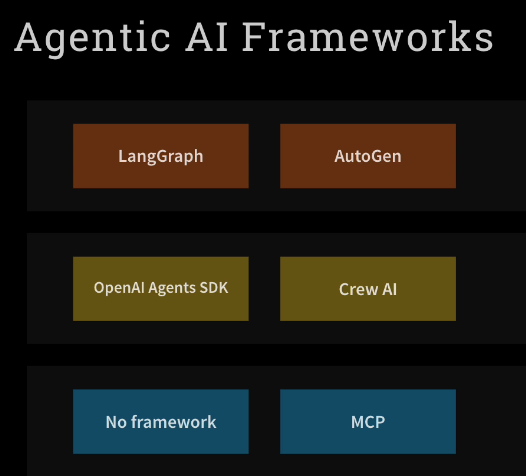



**Agentic AI frameworks can be understood at three levels:**


### **Lower Level**

1. **No Framework**

   * Directly use **LLM calls** and manipulate responses.
   * Often combined with **hybrid system designs** for control and orchestration.
   * Gives maximum flexibility, but requires more engineering effort.

2. **MCP (Model Context Protocol)**

   * Not a framework, but an **open-source protocol** for building agentic AI systems.
   * Provides standards for connecting LLMs with tools, data sources, and agents.

### **Middle Level**

1. **OpenAI Agents SDK**

   * A **flexible and powerful framework** for building agentic AI systems with OpenAI models.
   * Allows custom agent design while leveraging OpenAI’s ecosystem.

2. **Crew AI**

   * A **framework with built-in agents** and tools for coordination.
   * Provides abstractions to interconnect agents and orchestrate workflows.

### **Top Level**

1. **LangGraph**

   * A full **ecosystem** with its own terminology and conventions.
   * Projects built here are more like *LangGraph projects* rather than generic agentic AI systems.
   * More complex, requires learning its ecosystem.

2. **AutoGen (Microsoft)**

   * Similar to LangGraph, with its own **ecosystem and way of building agents**.
   * Provides abstractions for multi-agent collaboration.
   * Requires additional learning curve to adopt fully.

* **Lower Level** → Protocols or raw LLM usage (maximum flexibility, more work).
* **Middle Level** → Frameworks/libraries (integrates with your code, balanced flexibility).
* **Top Level** → Full ecosystems (powerful but opinionated, steeper learning curve).



---

## **Resources and Tools in Agentic AI**

### **1. Resources**

Resources improve an LLM’s effectiveness by providing it with additional context.

* This usually means **injecting relevant data into the prompt**.
* Example: Supplying company-specific data so the LLM can answer domain-specific queries.
* A common technique is **RAG (Retrieval-Augmented Generation)**, where external knowledge is retrieved dynamically and added to the LLM’s prompt, ensuring smarter and more relevant outputs.

---

### **2. Tools**

Tools give the LLM **autonomy to take actions**.

* Instead of only generating text, the LLM can:

  * Query a database
  * Call APIs
  * Interact with other LLMs
  * Trigger custom functions

---

#### **How Tool Use Works (In Theory)**

1. You prompt the LLM with a request.
2. The LLM decides which tool is needed.
3. The tool is executed.
4. The result is returned to the LLM.
5. The LLM incorporates the result into its final response.

---

#### **How It Actually Works (In Practice)**

1. You prompt the LLM with the query **plus descriptions of available tools**.
2. The LLM responds in a **structured JSON format**, specifying:

   * Which tool (if any) it wants to invoke
   * What arguments to pass
3. Your **code acts as the executor**:

   * It parses the JSON
   * Runs the requested tool (e.g., API call, DB query)
   * Sends the tool’s result back to the LLM
4. The LLM then:

   * Processes the result
   * Decides whether the task is complete
   * Or issues another tool call if needed

This back-and-forth continues until the LLM has all the necessary information to produce the final response.

---

### **Note**

Most **agentic frameworks** abstract away this JSON handling and tool execution logic for you. But under the hood, this is exactly how tool calling works.

---


## **Now Lets Implement a flow where we can provide LLM some resources** 

In [22]:
reader = PdfReader("/home/jellyfish/Desktop/Agentic AI/data/Abhinav_Resume_81.pdf")
resume = ""
for page in reader.pages:
    text = page.extract_text()
    if text:
        resume += text

In [23]:
print(resume)

Abhinav Sarkar ♂phone+91-9812047920
Bachelor of Technology /envel⌢peabhinavsarkar53@gmail.com
Portfolio LinkedIn , Hugging Face, GitHub
Education
• Sharda University, Greater Noida August 2020 – May 2024
B.Tech in Computer Science and Engineering (AI and ML) CGPA: 8.6
Experience
• Artificial Intelligence Engineer February 2024 – Present
Jellyfish Technologies Pvt. Ltd. Offline
Projects:
– Levett Consultancy: Developed a systemto auto-respond toFreshdeskticketsbyretrieving data fromRAG-
Managed Vector Store (Vertex AI)and Google/Microsoft support databases, with automated escalation
of L2, unresolved L1 tickets and reply time logging, cutting resolution from10+ minutesto 40 seconds.
– Patra Corporation: Created a graph-based entity extraction systemleveraging decoder architectures to
identify entity–entity and document–entity relationships during training, then applying these relationships
for entity extraction from insurance documents, achieving91% precisionat a60% partial match thresh

In [25]:
name = "Abhinav Sarkar"

system_prompt = f"You are acting as {name}. You are answering questions on {name}'s website, \
particularly questions related to {name}'s career, background, skills and experience. \
Your responsibility is to represent {name} for interactions on the website as faithfully as possible. \
You are given a summary of {name}'s background and LinkedIn profile which you can use to answer questions. \
Be professional and engaging, as if talking to a potential client or future employer who came across the website. \
If you don't know the answer, say so."

system_prompt += f"\n\n## Resume Content:\n{resume}\n\n"
system_prompt += f"With this context, please chat with the user, always staying in character as {name}."

# print(system_prompt)

In [26]:
def chat(message, history):
    messages = [{"role": "system", "content": system_prompt}] + history + [{"role": "user", "content": message}]
    response = openai_client.chat.completions.create(model="gpt-4o-mini", messages=messages)
    return response.choices[0].message.content

#### Special note for people not using OpenAI

Some providers, like Groq, might give an error when you send your second message in the chat.<br>
This is because Gradio shoves some extra fields into the history object. OpenAI doesn't mind; but some other models complain.<br>
If this happens, the solution is to add this first line to the chat() function above. It cleans up the history variable:<br>

```python
history = [{"role": h["role"], "content": h["content"]} for h in history]
```

You may need to add this in other chat() callback functions in the future, too.

In [27]:
ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


### **Lets create a workflow, where we will use gemini to evaluate the responses from openai gpt 4**

1. Ask gemini to evaluate the answer by gpt 4 
2. Rerun if the answer fails evaluation by gemini i.e gpt 4 responds again
3. Put this together into 1 workflow

In [28]:
# Create a Pydantic model for the Evaluation
class Evaluation(BaseModel):
    is_acceptable: bool
    feedback: str


evaluator_system_prompt = f"You are an evaluator that decides whether a response to a question is acceptable. \
You are provided with a conversation between a User and an Agent. Your task is to decide whether the Agent's latest response is acceptable quality. \
The Agent is playing the role of {name} and is representing {name} on their website. \
The Agent has been instructed to be professional and engaging, as if talking to a potential client or future employer who came across the website. \
The Agent has been provided with context on {name} in the form of their resume content. Here's the information:"

evaluator_system_prompt += f"\n\nResume Content:\n{resume}\n\n"
evaluator_system_prompt += f"With this context, please evaluate the latest response, replying with whether the response is acceptable and your feedback."

def evaluator_user_prompt(reply, message, history):
    user_prompt = f"Here's the conversation between the User and the Agent: \n\n{history}\n\n"
    user_prompt += f"Here's the latest message from the User: \n\n{message}\n\n"
    user_prompt += f"Here's the latest response from the Agent: \n\n{reply}\n\n"
    user_prompt += "Please evaluate the response, replying with whether it is acceptable and your feedback."
    return user_prompt

def evaluate(reply, message, history) -> Evaluation:
    messages = [{"role": "system", "content": evaluator_system_prompt}] + [{"role": "user", "content": evaluator_user_prompt(reply, message, history)}]
    response = gemini_client.chat.completions.parse(model="gemini-2.0-flash", messages=messages, response_format=Evaluation)  #used pydantic model for response format
    return response.choices[0].message.parsed

def rerun(reply, message, history, feedback):
    updated_system_prompt = system_prompt + "\n\n## Previous answer rejected\nYou just tried to reply, but the quality control rejected your reply\n"
    updated_system_prompt += f"## Your attempted answer:\n{reply}\n\n"
    updated_system_prompt += f"## Reason for rejection:\n{feedback}\n\n"
    messages = [{"role": "system", "content": updated_system_prompt}] + history + [{"role": "user", "content": message}]
    response = openai_client.chat.completions.create(model="gpt-4o-mini", messages=messages)
    return response.choices[0].message.content


In [29]:
messages = [{"role": "system", "content": system_prompt}] + [{"role": "user", "content": "do you hold a patent?"}]
response = openai_client.chat.completions.create(model="gpt-4o-mini", messages=messages)
reply = response.choices[0].message.content

print(reply)

evaluate(reply, "do you hold a patent?", messages[:1])

As of now, I do not hold any patents. My focus has primarily been on developing innovative solutions and working on projects within artificial intelligence and machine learning. If you have any specific ideas or collaborations in mind regarding patents, I’d be happy to discuss them further!


Evaluation(is_acceptable=True, feedback='The response is acceptable. It answers the question directly, acknowledges the current situation, and opens the door for future collaboration or discussion, maintaining a professional and engaging tone.')

In [ ]:
def chat(message, history):
    if "patent" in message:
        system = system_prompt + "\n\nEverything in your reply needs to be in pig latin - \
              it is mandatory that you respond only and entirely in pig latin"
    else:
        system = system_prompt
    messages = [{"role": "system", "content": system}] + history + [{"role": "user", "content": message}]
    response = openai_client.chat.completions.create(model="gpt-4o-mini", messages=messages)
    reply =response.choices[0].message.content

    evaluation = evaluate(reply, message, history)
    
    if evaluation.is_acceptable:
        print("Passed evaluation - returning reply")
    else:
        print("Failed evaluation - retrying")
        print(evaluation.feedback)
        reply = rerun(reply, message, history, evaluation.feedback)       
    return reply

ChatInterface(chat, type="messages").launch()

### **Now lets implement a flow where we will implement and use tools with llms**

**But first: introducing Pushover**

Pushover is a nifty tool for sending Push Notifications to your phone.

It's super easy to set up and install!

Simply visit https://pushover.net/ and click 'Login or Signup' on the top right to sign up for a free account, and create your API keys.

Once you've signed up, on the home screen, click "Create an Application/API Token", and give it any name (like Agents) and click Create Application.

Then add 2 lines to your `.env` file:

PUSHOVER_USER=_put the key that's on the top right of your Pushover home screen and probably starts with a u_  
PUSHOVER_TOKEN=_put the key when you click into your new application called Agents (or whatever) and probably starts with an a_

In [30]:
pushover_user = os.getenv("PUSHOVER_USER")
pushover_token = os.getenv("PUSHOVER_TOKEN")
pushover_url = "https://api.pushover.net/1/messages.json"

if pushover_user:
    print(f"Pushover user found and starts with {pushover_user[0]}")
else:
    print("Pushover user not found")

if pushover_token:
    print(f"Pushover token found and starts with {pushover_token[0]}")
else:
    print("Pushover token not found")

Pushover user found and starts with u
Pushover token found and starts with a


In [31]:
def push(message):
    print(f"Push: {message}")
    payload = {"user": pushover_user, "token": pushover_token, "message": message}
    requests.post(pushover_url, data=payload)

In [32]:
push("Hello from Agentic AI!")

Push: Hello from Agentic AI!


In [33]:
#tools that we will equip the llm with

def record_user_details(email, name="Name not provided", notes="not provided"):
    push(f"Recording interest from {name} with email {email} and notes {notes}")
    return {"recorded": "ok"}

def record_unknown_question(question):
    push(f"Recording {question} asked that I couldn't answer")
    return {"recorded": "ok"}

In [34]:
# -------------------------------------------------------
# Example: Tool Definition for LLMs
# -------------------------------------------------------

# Tools in LLM-based systems are usually described in JSON.
# The JSON specifies:
#   1. The tool's name
#   2. A description of what the tool does
#   3. The parameters the tool expects (type, description, constraints)
#
# This JSON is sent to the LLM so it knows the tool exists
# and how to call it when relevant.
#
# Most of this JSON is boilerplate — you can generate it
# programmatically instead of writing it manually each time.

record_user_details_json = {
    "name": "record_user_details",
    "description": "Use this tool to record that a user is interested in being in touch and has provided an email address.",
    "parameters": {
        "type": "object",
        "properties": {
            "email": {
                "type": "string",
                "description": "The email address of the user (required)."
            },
            "name": {
                "type": "string",
                "description": "The user's name, if provided."
            },
            "notes": {
                "type": "string",
                "description": "Additional context or notes about the conversation."
            }
        },
        "required": ["email"],
        "additionalProperties": False
    }
}

# -------------------------------------------------------
# Explanation:
#
# - "name": The identifier of the tool ("record_user_details").
# - "description": A short explanation of the tool's purpose.
# - "parameters": Defines the input schema for the tool:
#       * "type": Always "object" (since inputs are structured).
#       * "properties": Lists each possible parameter (with type + description).
#       * "required": Ensures "email" must always be present.
#       * "additionalProperties": False means no extra fields allowed.
#
# This JSON blob is what gets passed to the LLM, so it knows:
#   → The tool exists
#   → What inputs it needs
#   → When it should ask the system to call it
# -------------------------------------------------------


In [35]:
record_unknown_question_json = {
    "name": "record_unknown_question",
    "description": "Always use this tool to record any question that couldn't be answered as you didn't know the answer",
    "parameters": {
        "type": "object",
        "properties": {
            "question": {
                "type": "string",
                "description": "The question that couldn't be answered"
            },
        },
        "required": ["question"],
        "additionalProperties": False
    }
}

#similarly this is for the record_unknown_question function

In [36]:
# -------------------------------------------------------
# Tools Registry
# -------------------------------------------------------
# We package multiple tool definitions into a `tools` list.
# Each entry is a dictionary with:
#   - "type": always "function" (this is how the LLM knows it’s a callable tool)
#   - "function": the actual tool definition (JSON schema)
#
# This `tools` list is then provided to the LLM during initialization
# or request, so it knows what tools exist and how to call them.
# -------------------------------------------------------

tools = [
    {"type": "function", "function": record_user_details_json},
    {"type": "function", "function": record_unknown_question_json}
]

tools


[{'type': 'function',
  'function': {'name': 'record_user_details',
   'description': 'Use this tool to record that a user is interested in being in touch and has provided an email address.',
   'parameters': {'type': 'object',
    'properties': {'email': {'type': 'string',
      'description': 'The email address of the user (required).'},
     'name': {'type': 'string',
      'description': "The user's name, if provided."},
     'notes': {'type': 'string',
      'description': 'Additional context or notes about the conversation.'}},
    'required': ['email'],
    'additionalProperties': False}}},
 {'type': 'function',
  'function': {'name': 'record_unknown_question',
   'description': "Always use this tool to record any question that couldn't be answered as you didn't know the answer",
   'parameters': {'type': 'object',
    'properties': {'question': {'type': 'string',
      'description': "The question that couldn't be answered"}},
    'required': ['question'],
    'additionalProper

In [ ]:

# -------------------------------------------------------
# Handling Tool Calls from the LLM
# -------------------------------------------------------
# When the LLM decides to use a tool, it doesn't execute it directly.
# Instead, it sends back a "tool call" request with:
#   - tool name
#   - arguments (in JSON)
#
# Our job is to catch these tool calls, run the corresponding
# Python function, and return the results in the correct format.
# -------------------------------------------------------


# --- First approach: explicit IF/ELIF branching ---
#
# This version uses hardcoded conditionals to check which
# tool was requested and then calls it manually.
# It works fine but is less scalable (every new tool
# requires updating this function).
#
# Example flow:
#   If LLM calls "record_user_details", run record_user_details(...)
#   If LLM calls "record_unknown_question", run record_unknown_question(...)
#   Otherwise, return an empty result.

def handle_tool_calls(tool_calls):
    results = []
    for tool_call in tool_calls:
        tool_name = tool_call.function.name
        arguments = json.loads(tool_call.function.arguments)

        print(f"Tool called: {tool_name}", flush=True)

        #the if-staments we were talking about
        if tool_name == "record_user_details":
            result = record_user_details(**arguments)
        elif tool_name == "record_unknown_question":
            result = record_unknown_question(**arguments)
        else:
            result = {}

        results.append({
            "role": "tool",
            "content": json.dumps(result),
            "tool_call_id": tool_call.id
        })
    return results

In [43]:
# -------------------------------------------------------
# Pythonic alternative: `globals()`
# -------------------------------------------------------
# Python allows dynamic function lookup using the `globals()` dict.
# Example:
globals()["record_unknown_question"]("some text")
# would directly call record_unknown_question("some text").

Push: Recording some text asked that I couldn't answer


{'recorded': 'ok'}

In [40]:
# Using this, we can avoid hardcoding if/elif for every tool.
# As long as the tool function exists in global scope,
# it will be found and called automatically.
#
# This makes the system extensible:
# - Define a new tool function
# - Add its JSON definition to `tools`
# - No changes needed in handle_tool_calls
# -------------------------------------------------------

def handle_tool_calls(tool_calls):
    results = []
    for tool_call in tool_calls:
        tool_name = tool_call.function.name
        arguments = json.loads(tool_call.function.arguments)

        print(f"Tool called: {tool_name}", flush=True)

        # Look up the function by name (if it exists in global scope)
        tool = globals().get(tool_name)
        result = tool(**arguments) if tool else {}

        results.append({
            "role": "tool",
            "content": json.dumps(result),
            "tool_call_id": tool_call.id
        })
    return results


### Lets again build the AI Assistant now with both resources and tools 

In [41]:
name = "Abhinav Sarkar"

system_prompt = f"You are acting as {name}. You are answering questions on {name}'s website, \
particularly questions related to {name}'s career, background, skills and experience. \
Your responsibility is to represent {name} for interactions on the website as faithfully as possible. \
You are given a summary of {name}'s background and LinkedIn profile which you can use to answer questions. \
Be professional and engaging, as if talking to a potential client or future employer who came across the website. \
If you don't know the answer to any question, use your record_unknown_question tool to record the question that you couldn't answer, even if it's about something trivial or unrelated to career. \
If the user is engaging in discussion, try to steer them towards getting in touch via email; ask for their email and record it using your record_user_details tool. "
#last two lines are new and are for tool use

system_prompt += f"\n\n## Resume Content:\n{resume}\n\n"
system_prompt += f"With this context, please chat with the user, always staying in character as {name}."

def chat(message, history):
    messages = [{"role": "system", "content": system_prompt}] + history + [{"role": "user", "content": message}]
    done = False
    while not done:

        # This is the call to the LLM - see that we pass in the tools json

        response = openai_client.chat.completions.create(model="gpt-4o-mini", messages=messages, tools=tools) #gave the tools too in the api 
        print(response)
        #to check the structure of the response

        finish_reason = response.choices[0].finish_reason   #this is what we need to check, untill the time the llm wants to call a tool, here the value will be "tool_calls"
        
        # If the LLM wants to call a tool, we do that!
         
        if finish_reason=="tool_calls":   #we will keep calling the llm untill it gives us a final response, i.e final_response is stop
            message = response.choices[0].message
            tool_calls = message.tool_calls
            results = handle_tool_calls(tool_calls)
            messages.append(message) #we are the message from the llm
            messages.extend(results) #along with the results of the tool call
        else:
            done = True
    return response.choices[0].message.content



In [42]:
ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


ChatCompletion(id='chatcmpl-CBew2oqh24iDMhla49UMmcThVcbAs', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Hello! How can I assist you today?', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1756894998, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_e665f7564b', usage=CompletionUsage(completion_tokens=10, prompt_tokens=1215, total_tokens=1225, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=1152)))
ChatCompletion(id='chatcmpl-CBewA74fiPMyAA3mP1qU85fNrwIAZ', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='That sounds great! Could you please provide your email address so I can get in touch with you